继续使用上一小节的数据

In [1]:
import numpy as np
from sklearn import datasets
np.set_printoptions(threshold=np.inf)
mydigits = datasets.load_digits()
X = mydigits.data
y = mydigits.target.copy()
y[mydigits.target == 9] = 1
y[mydigits.target != 9] = 0

用逻辑回归对数据进行训练

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)
logReg = LogisticRegression()
logReg.fit(X_train, y_train)
y_predict = logReg.predict(X_test)

# Set threshold according to scores returned by decision_function.   
# compute precision_score and recall_score according this threshold.    


In [3]:
scores = logReg.decision_function(X_test)

In [4]:
thresholds = np.arange(np.min(scores), np.max(scores), 0.1) 

In [16]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precisions = []
recalls = []
for threshold in thresholds:
    y_predict1 =  np.array(scores >= threshold, dtype='int')
    precisions.append(precision_score(y_test, y_predict1))
    recalls.append(recall_score(y_test, y_predict1))


In [6]:
len(precisions)

1056

In [7]:
len(recalls)

1056

In [8]:
len(thresholds)

1056

# draw precision_recall_curve with ourself method

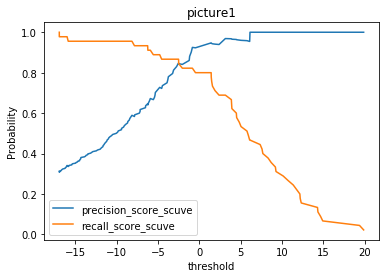

In [17]:
import matplotlib.pyplot as plt
plt.plot(thresholds, precisions, label='precision_score_scuve')
plt.plot(thresholds, recalls, label='recall_score_scuve')
plt.legend()
plt.xlabel('threshold')
plt.ylabel('Probability')
plt.title("picture1")
plt.show()

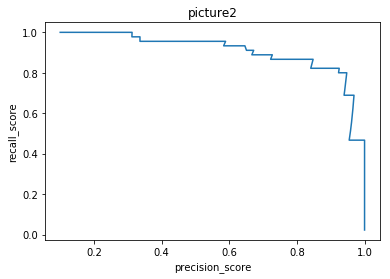

In [10]:
plt.plot(precisions,recalls)
plt.xlabel('precision_score')
plt.ylabel('recall_score')
plt.title("picture2")
plt.show()

# draw precision_recall_curve with sklearn method

In [18]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, scores)

In [12]:
len(precision)

145

In [13]:
len(recall)

145

In [14]:
len(thresholds)

144

found that the length of 'thresholds' is shorter than the length of 'precision' and 'recall'1.   
Check the documentation,find:   
The last precision and recall values are 1. and 0. respectively and do not have a corresponding threshold. 

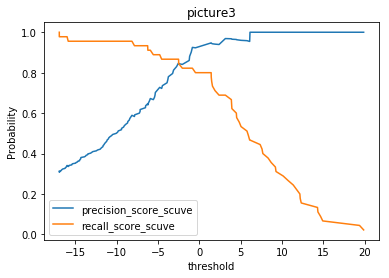

In [19]:
plt.plot(thresholds, precision[:-1], label='precision_score_scuve')
plt.plot(thresholds, recall[:-1], label='recall_score_scuve')
plt.legend()
plt.xlabel('threshold')
plt.ylabel('Probability')
plt.title("picture3")
plt.show()

picture3 with sklearn method is different from picture1 with myself method, beacuse only some important datas is selected in sklearn method

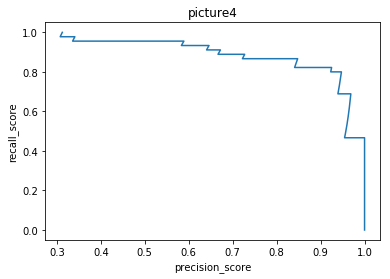

In [20]:
plt.plot(precision,recall)
plt.xlabel('precision_score')
plt.ylabel('recall_score')
plt.title("picture4")
plt.show()